In [150]:
#import necessary libraries
import sklearn.kernel_ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf


In [151]:
#load the 2022 yields from the USGOV site
yields_df = pd.read_csv('/Users/julianlagier/Desktop/python projects/daily-treasury-rates-2022.csv')
yields_df.head()
yields_df_2019 =pd.read_csv('/Users/julianlagier/Desktop/python projects/daily-treasury-rates-2019.csv')
yields_df_2020 =pd.read_csv('/Users/julianlagier/Desktop/python projects/daily-treasury-rates-2020.csv')
yields_df_2021 =pd.read_csv('/Users/julianlagier/Desktop/python projects/daily-treasury-rates-2021.csv')
display(yields_df_2019.head(),yields_df_2020.head(),yields_df_2021.head())

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,12/31/2019,1.48,1.51,1.55,1.60,1.59,1.58,1.62,1.69,1.83,1.92,2.25,2.39
1,12/30/2019,1.51,1.53,1.57,1.60,1.57,1.58,1.59,1.68,1.81,1.90,2.21,2.34
2,12/27/2019,1.56,1.56,1.57,1.59,1.51,1.59,1.60,1.68,1.80,1.88,2.18,2.32
3,12/26/2019,1.59,1.60,1.58,1.61,1.53,1.64,1.65,1.72,1.85,1.90,2.19,2.33
4,12/24/2019,1.55,1.58,1.58,1.61,1.53,1.62,1.64,1.72,1.83,1.90,2.20,2.33


,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,12/31/2020,0.08,0.08,0.09,0.09,0.10,0.13,0.17,0.36,0.65,0.93,1.45,1.65
1,12/30/2020,0.06,0.06,0.08,0.09,0.12,0.12,0.17,0.37,0.66,0.93,1.46,1.66
2,12/29/2020,0.08,0.09,0.10,0.12,0.11,0.12,0.17,0.37,0.66,0.94,1.47,1.67
3,12/28/2020,0.09,0.10,0.11,0.11,0.11,0.13,0.17,0.38,0.65,0.94,1.46,1.67
4,12/24/2020,0.09,0.09,0.09,0.09,0.10,0.13,0.17,0.37,0.66,0.94,1.46,1.66


,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,12/31/2021,0.06,0.05,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
1,12/30/2021,0.06,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
2,12/29/2021,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
3,12/28/2021,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
4,12/27/2021,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88


In [152]:
#Set all indexes as date
yields_df_2019.set_index(yields_df_2019['Date'], drop = True, inplace= True)
yields_df_2020.set_index(yields_df_2020['Date'], drop = True, inplace= True)
yields_df_2021.set_index(yields_df_2021['Date'], drop = True, inplace= True)

In [153]:
#drop extra columns
yields_df_2019.drop('Date', axis = 1)
yields_df_2020.drop('Date', axis = 1)
yields_df_2021.drop('Date', axis = 1)

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
12/31/2021,0.06,0.05,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
12/30/2021,0.06,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
12/29/2021,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
12/28/2021,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
12/27/2021,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...
01/08/2021,0.08,0.08,0.08,0.09,0.10,0.14,0.24,0.49,0.81,1.13,1.67,1.87
01/07/2021,0.09,0.09,0.09,0.09,0.11,0.14,0.22,0.46,0.78,1.08,1.64,1.85
01/06/2021,0.09,0.09,0.09,0.09,0.11,0.14,0.20,0.43,0.74,1.04,1.60,1.81


In [154]:
yields_df_2019 = yields_df_2019.reindex(index = yields_df_2019.index[::-1])
yields_df_2020 = yields_df_2020.reindex(index = yields_df_2020.index[::-1])
yields_df_2021 = yields_df_2021.reindex(index = yields_df_2021.index[::-1])

In [155]:
#Set date as index for all dfs
yields_df['Date'] = pd.to_datetime(yields_df['Date'])
yields_df.set_index(yields_df['Date'], drop = True, inplace= True)
yields_df = yields_df.drop('Date',axis=1)
yields_df = yields_df.reindex(index = yields_df.index[::-1])


In [156]:
yields_df

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-22,2.15,2.29,2.49,2.97,3.01,2.98,2.93,2.87,2.85,2.77,3.23,3.00
2022-07-25,2.14,2.31,2.62,3.06,3.07,3.00,2.98,2.89,2.89,2.81,3.28,3.04
2022-07-26,2.17,2.35,2.55,3.01,3.06,3.02,3.01,2.89,2.88,2.81,3.27,3.03


In [157]:

#Get the SP loaded up for comparisons
sp = yf.Ticker('^GSPC')
#Check if we got the correct data
sp500 = sp.history(period='max')


In [158]:
#check columns,index and types
print(type(sp500),sp500.index,sp500.columns,sp500.dtypes)
sp2022 = sp500['2022-01-01':'2022-07-28']

<class 'pandas.core.frame.DataFrame'> DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28',
               '2022-07-29', '2022-08-01', '2022-08-02', '2022-08-03',
               '2022-08-04', '2022-08-05'],
              dtype='datetime64[ns]', name='Date', length=18267, freq=None) Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object') Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object


In [159]:
#set both indexes to datetime
yields_df.index = pd.to_datetime(yields_df.index)
sp2022.index = pd.to_datetime(sp2022.index)

In [160]:
#Check that both indexes match
yields_df.index == sp2022.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [161]:
#Join both tables to finally run the correlation
yields_sp = yields_df.join(sp2022)
#Check the table
yields_sp.head()

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01,4778.140137,4796.640137,4758.169922,4796.560059,2775190000,0,0
2022-01-04,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07,4804.509766,4818.620117,4774.270020,4793.540039,3641050000,0,0
2022-01-05,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09,4787.990234,4797.700195,4699.439941,4700.580078,3733540000,0,0
2022-01-06,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09,4693.390137,4725.009766,4671.259766,4696.049805,3371250000,0,0
2022-01-07,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11,4697.660156,4707.950195,4662.740234,4677.029785,3279870000,0,0


In [162]:
yields_sp.corr()['Close']

1 Mo           -0.783823
2 Mo           -0.823270
3 Mo           -0.823272
6 Mo           -0.846964
1 Yr           -0.849928
2 Yr           -0.793510
3 Yr           -0.773825
5 Yr           -0.769092
7 Yr           -0.772117
10 Yr          -0.775152
20 Yr          -0.832532
30 Yr          -0.829838
Open            0.981710
High            0.991522
Low             0.992710
Close           1.000000
Volume         -0.164723
Dividends            NaN
Stock Splits         NaN
Name: Close, dtype: float64

In [163]:
yields_sp['Close'].describe()

count     143.000000
mean     4233.669229
std       287.688096
min      3666.770020
25%      3970.295044
50%      4277.879883
75%      4473.039795
max      4796.560059
Name: Close, dtype: float64

In [164]:
pearson_coeff_sp, p_value = stats.pearsonr(sp2022['Close'],yields_df['1 Mo'])
pearson_coeff_sp,p_value

(-0.7838233463600859, 5.6856599026550745e-31)

In [165]:
yields_sp.corr()['Open']

1 Mo           -0.793512
2 Mo           -0.832278
3 Mo           -0.831391
6 Mo           -0.854763
1 Yr           -0.853192
2 Yr           -0.792505
3 Yr           -0.770902
5 Yr           -0.763208
7 Yr           -0.765684
10 Yr          -0.768004
20 Yr          -0.828900
30 Yr          -0.825597
Open            1.000000
High            0.995376
Low             0.992882
Close           0.981710
Volume         -0.171665
Dividends            NaN
Stock Splits         NaN
Name: Open, dtype: float64

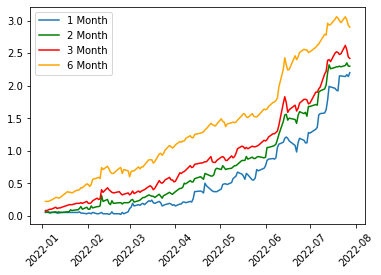

In [166]:
fig, ax  = plt.subplots()
ax.plot(yields_df.index, yields_df['1 Mo'], label = '1 Month')
ax.plot(yields_df.index, yields_df['2 Mo'],'g', label = '2 Month')
ax.plot(yields_df.index, yields_df['3 Mo'],'r', label = '3 Month')
ax.plot(yields_df.index, yields_df['6 Mo'],'orange', label = '6 Month')


lines = ax.get_lines()
ax.legend(lines, [line.get_label() for line in lines], loc= 'upper left')
plt.xticks(rotation = 45)
plt.show()

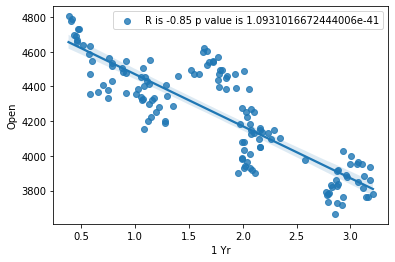

In [167]:
#Check the signifance of the correlation between the SP500 close and the 1 Month treasury yield
pearson_coeff_sp, p_value = stats.pearsonr(yields_sp['Open'],yields_sp['1 Yr'])

#Plot the correlation between the yield and the sp close 
corr_plot =sns.regplot(x='1 Yr',y='Open',data = yields_sp,\
label = "R is "+ str(round(pearson_coeff_sp,2))+' p value is '+ str(p_value))
plt.legend()
plt.savefig('SP500, 1MO yield regression 2022', dpi= 200)


(-0.7838233463600859, 5.6856599026550745e-31)

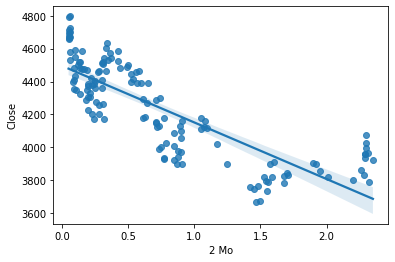

In [168]:
#Plot the correlation between the yield and the sp close once again
corr_plot2 =sns.regplot(x='2 Mo',y='Close',data = yields_sp)
pearson_coeff_sp_2, p_value_2 = stats.pearsonr(yields_sp['Close'],yields_sp['1 Mo'])
pearson_coeff_sp_2, p_value_2



In [169]:
#Create class and model
lm = LinearRegression()
#Fit the data
lm.fit(yields_sp[['Close']],yields_sp['1 Mo'])
#Create the model predictions
yhat = lm.predict(yields_sp[['Close']])
print(lm.intercept_, lm.coef_)

7.6505648417210885 [-0.00167309]


In [170]:
#Get the model R^2 which explains how much a varibale explain variation Of another variable
lm.score(yields_sp[['Close']],yields_sp['1 Mo'])

0.614379038299123

<AxesSubplot:xlabel='Close', ylabel='1 Mo'>

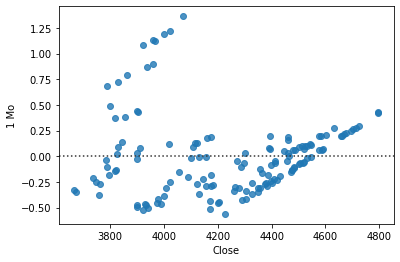

In [171]:
#Plot the residuals to see if a linear model is correct or not
sns.residplot(x=yields_sp['Close'],y=yields_sp['1 Mo'],data = yields_sp)
#interpret the results: since there is a very obvious curve although important the sp500 is not the sole factor in predicting the yield curve

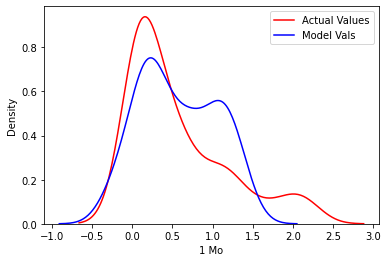

In [172]:
#Plot the distribution of the actual values and the model values
ax4 = sns.kdeplot(yields_sp['1 Mo'], color = 'r', label = 'Actual Values')
ax5 = sns.kdeplot(yhat, color = 'b', label = 'Model Vals')
plt.legend()
#this further confirms the theory that a linear regression model doesn't make the cut

In [173]:
#NOW DO THE SAME FOR THE SP500 CLOSE.
#Create class and model
lm_sp = LinearRegression()
#Fit the data
lm_sp.fit(yields_sp[['1 Yr']],yields_sp['Open'])
#Create the model predictions
yhat_sp = lm_sp.predict(yields_sp[['1 Yr']])
print(lm_sp.intercept_, lm_sp.coef_)

4769.012537246225 [-298.93499703]


In [174]:
#Get the model R^2 which explains how much a varibale explain variation Of another variable
lm_sp.score(yields_sp[['1 Yr']],yields_sp['Open'])

0.7279363236809726

<AxesSubplot:xlabel='1 Yr', ylabel='Open'>

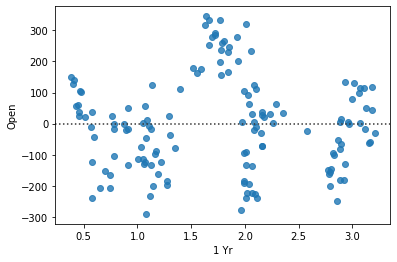

In [175]:
#Plot the residuals to see if a linear model is correct or not
sns.residplot(x=yields_sp['1 Yr'],y=yields_sp['Open'],data = yields_sp)
#interpret the results: since there is a very obvious curve although important the sp500 is not the sole factor in predicting the yield curve

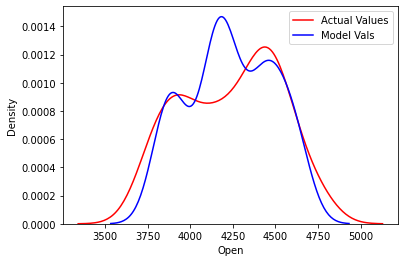

In [176]:
#Plot the distribution of the actual values and the model values
ax4 = sns.kdeplot(yields_sp['Open'], color = 'r', label = 'Actual Values')
ax5 = sns.kdeplot(yhat_sp, color = 'b', label = 'Model Vals')
plt.legend()
#this further confirms the theory that a linear regression model doesn't make the cut

In [177]:
#Add Europe's S&P 500 for comparisons
Euro_data = yf.Ticker('^N100')
euro_sp = Euro_data.history(period = 'max')
#Verify we got the correct data from Yahoo
euro_sp.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-12-31,1000.000000,1000.000000,1000.000000,1000.000000,0,0,0
2000-01-03,996.770020,996.770020,996.770020,996.770020,0,0,0
2000-01-04,955.969971,955.969971,955.969971,955.969971,0,0,0
2000-01-05,930.260010,930.260010,930.260010,930.260010,0,0,0
2000-01-06,922.460022,922.460022,922.460022,922.460022,0,0,0


In [178]:
#Change the Date column to time and make it the index
euro_sp.index = pd.to_datetime(euro_sp.index)
euro_sp.index


DatetimeIndex(['1999-12-31', '2000-01-03', '2000-01-04', '2000-01-05',
               '2000-01-06', '2000-01-07', '2000-01-10', '2000-01-11',
               '2000-01-12', '2000-01-13',
               ...
               '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28',
               '2022-07-29', '2022-08-01', '2022-08-02', '2022-08-03',
               '2022-08-04', '2022-08-05'],
              dtype='datetime64[ns]', name='Date', length=5779, freq=None)

In [179]:
#get 2022 data for example analysis
euro_sp_22 = euro_sp['2022-01-03':'2022-07-28']
#Make sure we got the right segment
euro_sp_22.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03,1367.339966,1376.239990,1367.339966,1372.060059,118232400,0,0
2022-01-04,1381.770020,1390.930054,1377.859985,1383.489990,184085700,0,0
2022-01-05,1382.459961,1389.949951,1381.459961,1388.089966,177249500,0,0
2022-01-06,1365.469971,1372.989990,1359.510010,1365.170044,183074300,0,0
2022-01-07,1368.329956,1370.780029,1355.770020,1363.020020,174670000,0,0


In [180]:
#Join both tables to get data
sp_eur = sp2022.join(euro_sp_22, lsuffix= '_sp', rsuffix='_eur')
sp_eur.head()

,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,Close_eur,Volume_eur,Dividends_eur,Stock Splits_eur
Date,,,,,,,,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,2775190000,0,0,1367.339966,1376.239990,1367.339966,1372.060059,118232400.0,0.0,0.0
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,3641050000,0,0,1381.770020,1390.930054,1377.859985,1383.489990,184085700.0,0.0,0.0
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,3733540000,0,0,1382.459961,1389.949951,1381.459961,1388.089966,177249500.0,0.0,0.0
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,3371250000,0,0,1365.469971,1372.989990,1359.510010,1365.170044,183074300.0,0.0,0.0
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,3279870000,0,0,1368.329956,1370.780029,1355.770020,1363.020020,174670000.0,0.0,0.0


In [181]:
sp_eur.corr()

,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,Close_eur,Volume_eur,Dividends_eur,Stock Splits_eur
Open_sp,1.000000,0.995376,0.992882,0.981710,-0.171665,NaN,NaN,0.892081,0.910573,0.886525,0.887179,-0.005469,NaN,NaN
High_sp,0.995376,1.000000,0.994203,0.991522,-0.149817,NaN,NaN,0.888547,0.910951,0.886203,0.892423,0.008958,NaN,NaN
Low_sp,0.992882,0.994203,1.000000,0.992710,-0.193210,NaN,NaN,0.881195,0.901390,0.882970,0.888526,-0.018506,NaN,NaN
Close_sp,0.981710,0.991522,0.992710,1.000000,-0.164723,NaN,NaN,0.879013,0.900070,0.878662,0.887347,0.000888,NaN,NaN
Volume_sp,-0.171665,-0.149817,-0.193210,-0.164723,1.000000,NaN,NaN,-0.293937,-0.261339,-0.314555,-0.305287,0.670107,NaN,NaN
Dividends_sp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits_sp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open_eur,0.892081,0.888547,0.881195,0.879013,-0.293937,NaN,NaN,1.000000,0.990842,0.988658,0.976304,-0.181288,NaN,NaN
High_eur,0.910573,0.910951,0.901390,0.900070,-0.261339,NaN,NaN,0.990842,1.000000,0.988955,0.987900,-0.130755,NaN,NaN
Low_eur,0.886525,0.886203,0.882970,0.878662,-0.314555,NaN,NaN,0.988658,0.988955,1.000000,0.992256,-0.215484,NaN,NaN


In [182]:
#Check for nan values
print(sp_eur.isna().any())
#See the nan values
sp_eur[sp_eur['Open_eur'].isna()==True]

Open_sp             False
High_sp             False
Low_sp              False
Close_sp            False
Volume_sp           False
Dividends_sp        False
Stock Splits_sp     False
Open_eur             True
High_eur             True
Low_eur              True
Close_eur            True
Volume_eur           True
Dividends_eur        True
Stock Splits_eur     True
dtype: bool


,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,Close_eur,Volume_eur,Dividends_eur,Stock Splits_eur
Date,,,,,,,,,,,,,,
2022-04-18,4385.629883,4410.310059,4370.299805,4391.689941,3509340000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
#Since it was an european holiday we are going to assign values equal to the day before
sp_eur.loc['2022-04-18',['Open_eur','High_eur','Low_eur','Close_eur','Volume_eur','Dividends_eur','Stock Splits_eur']]=sp_eur.loc['2022-04-14',['Open_eur','High_eur','Low_eur','Close_eur','Volume_eur','Dividends_eur','Stock Splits_eur']]

In [184]:
#check correlation between the indexes
sp_eur.corr()['Open_sp']
sp_eur.isna().any()

Open_sp             False
High_sp             False
Low_sp              False
Close_sp            False
Volume_sp           False
Dividends_sp        False
Stock Splits_sp     False
Open_eur            False
High_eur            False
Low_eur             False
Close_eur           False
Volume_eur          False
Dividends_eur       False
Stock Splits_eur    False
dtype: bool

0.8919273411068508 1.8801145122775765e-50


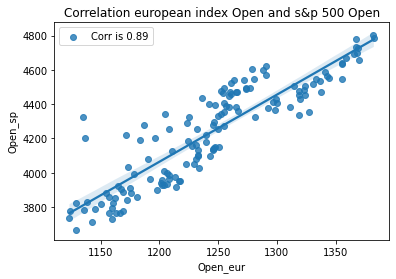

In [185]:
#Determine if the correlation is statistically significant
pearson_coeff_sp_eur, p_value_sp_eur = stats.pearsonr(sp_eur['Open_sp'],sp_eur['Open_eur'])
print(pearson_coeff_sp_eur,p_value_sp_eur)


#Plot the relationship for extra style points, after we determined the correlation is statistically significant
euro_sp_plot = sns.regplot(x='Open_eur',y='Open_sp',data = sp_eur,\
label = 'Corr is '+ str(round(pearson_coeff_sp_eur,2)))
plt.legend()
plt.title('Correlation european index Open and s&p 500 Open')
plt.savefig('Correlation european index Open and s&p 500 Open', dpi = 300)



In [186]:
#Join our tables to include yields for multivariate linear regression
sp_eur_yields = sp_eur.join(yields_df)
sp_eur_yields.head()

,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,...,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,2775190000,0,0,1367.339966,1376.239990,1367.339966,...,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,3641050000,0,0,1381.770020,1390.930054,1377.859985,...,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,3733540000,0,0,1382.459961,1389.949951,1381.459961,...,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,3371250000,0,0,1365.469971,1372.989990,1359.510010,...,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,3279870000,0,0,1368.329956,1370.780029,1355.770020,...,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11


In [187]:
#check if we have any NaNs
sp_eur_yields.isna().any()

Open_sp             False
High_sp             False
Low_sp              False
Close_sp            False
Volume_sp           False
Dividends_sp        False
Stock Splits_sp     False
Open_eur            False
High_eur            False
Low_eur             False
Close_eur           False
Volume_eur          False
Dividends_eur       False
Stock Splits_eur    False
1 Mo                False
2 Mo                False
3 Mo                False
6 Mo                False
1 Yr                False
2 Yr                False
3 Yr                False
5 Yr                False
7 Yr                False
10 Yr               False
20 Yr               False
30 Yr               False
dtype: bool

In [188]:
sp_eur_yields.corr()

,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,...,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Open_sp,1.000000,0.995376,0.992882,0.981710,-0.171665,NaN,NaN,0.891927,0.910289,0.886563,...,-0.831391,-0.854763,-0.853192,-0.792505,-0.770902,-0.763208,-0.765684,-0.768004,-0.828900,-0.825597
High_sp,0.995376,1.000000,0.994203,0.991522,-0.149817,NaN,NaN,0.888444,0.910726,0.886265,...,-0.842930,-0.865924,-0.864550,-0.803585,-0.782171,-0.774852,-0.777218,-0.779163,-0.839249,-0.835777
Low_sp,0.992882,0.994203,1.000000,0.992710,-0.193210,NaN,NaN,0.880862,0.900881,0.882893,...,-0.815819,-0.839427,-0.841015,-0.782855,-0.762467,-0.757349,-0.760619,-0.763938,-0.822896,-0.820218
Close_sp,0.981710,0.991522,0.992710,1.000000,-0.164723,NaN,NaN,0.878814,0.899722,0.878676,...,-0.823272,-0.846964,-0.849928,-0.793510,-0.773825,-0.769092,-0.772117,-0.775152,-0.832532,-0.829838
Volume_sp,-0.171665,-0.149817,-0.193210,-0.164723,1.000000,NaN,NaN,-0.294508,-0.261770,-0.315468,...,-0.141201,-0.100328,-0.044964,0.010996,0.020572,0.006790,-0.000243,-0.002031,0.000050,0.002537
Dividends_sp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits_sp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open_eur,0.891927,0.888444,0.880862,0.878814,-0.294508,NaN,NaN,1.000000,0.990837,0.988629,...,-0.717958,-0.768636,-0.801504,-0.790101,-0.769662,-0.738456,-0.728207,-0.721158,-0.767658,-0.760712
High_eur,0.910289,0.910726,0.900881,0.899722,-0.261770,NaN,NaN,0.990837,1.000000,0.988883,...,-0.749759,-0.801183,-0.837832,-0.828350,-0.809723,-0.781818,-0.772808,-0.766426,-0.810560,-0.804060
Low_eur,0.886563,0.886265,0.882893,0.878676,-0.315468,NaN,NaN,0.988629,0.988883,1.000000,...,-0.696764,-0.747803,-0.783491,-0.773090,-0.753021,-0.721820,-0.711438,-0.704741,-0.750358,-0.743264


In [189]:
#Procede to model relationships
#Create class and model
lm_sp_eur = LinearRegression()
#Fit the data
lm_sp_eur.fit(sp_eur_yields[['1 Yr','Open_eur']],sp_eur_yields['Open_sp'])
#Create the model predictions
yhat_sp_eur = lm_sp_eur.predict(sp_eur_yields[['1 Yr','Open_eur']])
print(lm_sp_eur.intercept_, lm_sp_eur.coef_)

1299.4447293339613 [-135.51637094    2.55508652]


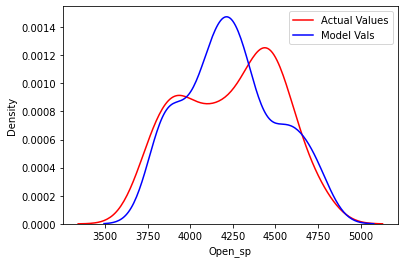

In [190]:
#Plot Model against Sp500 Open Actual Values
sns.kdeplot(sp_eur_yields['Open_sp'], color = 'r', label = 'Actual Values')
sns.kdeplot(yhat_sp_eur, color = 'b', label = 'Model Vals')
plt.legend()

In [191]:
#Check how appropiate the model was for explaining changes in the open
lm_sp_eur.score(sp_eur_yields[['1 Yr','Open_eur']],sp_eur_yields['Open_sp'])

0.8490289726024776

In [192]:
#Add Japan's stock market close
#Add Europe's S&P 500 for comparisons
Jap_data = yf.Ticker('^N225')
jap_sp = Jap_data.history(period = 'max')
#Verify we got the correct data from Yahoo
jap_sp.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,0,0,0
1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,0,0,0
1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,0,0,0
1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,0,0,0
1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,0,0,0


In [193]:
#Change index to datetime
jap_sp.index = pd.to_datetime(jap_sp.index)
jap_sp.index
#Segment for 2022 only
jap_sp_22 = jap_sp['2022-01-03':'2022-07-28']
jap_sp_22.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-04,29098.410156,29323.789062,28954.560547,29301.789062,66000000,0,0
2022-01-05,29288.800781,29388.160156,29204.449219,29332.160156,78600000,0,0
2022-01-06,29136.750000,29158.949219,28487.869141,28487.869141,71600000,0,0
2022-01-07,28711.529297,28813.089844,28293.699219,28478.560547,75200000,0,0
2022-01-11,28380.900391,28473.470703,28089.490234,28222.480469,73700000,0,0


In [194]:
#Check if the lenghts match
print(len(jap_sp_22.index))
#Since lens don't match we will have to clean data later, now we merge them together
ejuy = sp_eur_yields.join(jap_sp_22)
ejuy.head()
#Europe.Japan.Usa.Yields.

139


,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,...,10 Yr,20 Yr,30 Yr,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,2775190000,0,0,1367.339966,1376.239990,1367.339966,...,1.63,2.05,2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,3641050000,0,0,1381.770020,1390.930054,1377.859985,...,1.66,2.10,2.07,29098.410156,29323.789062,28954.560547,29301.789062,66000000.0,0.0,0.0
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,3733540000,0,0,1382.459961,1389.949951,1381.459961,...,1.71,2.12,2.09,29288.800781,29388.160156,29204.449219,29332.160156,78600000.0,0.0,0.0
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,3371250000,0,0,1365.469971,1372.989990,1359.510010,...,1.73,2.12,2.09,29136.750000,29158.949219,28487.869141,28487.869141,71600000.0,0.0,0.0
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,3279870000,0,0,1368.329956,1370.780029,1355.770020,...,1.76,2.15,2.11,28711.529297,28813.089844,28293.699219,28478.560547,75200000.0,0.0,0.0


In [195]:
#Check for Nan values in data since Jap data was shorter
ejuy[ejuy['Open'].isna()]

,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,...,10 Yr,20 Yr,30 Yr,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,2775190000,0,0,1367.339966,1376.239990,1367.339966,...,1.63,2.05,2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-10,4655.339844,4673.020020,4582.240234,4670.290039,3621800000,0,0,1369.630005,1370.560059,1341.689941,...,1.78,2.15,2.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-11,4506.270020,4526.330078,4401.410156,4418.640137,4164960000,0,0,1324.209961,1324.209961,1324.030029,...,1.92,2.30,2.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-23,4324.930176,4341.509766,4221.509766,4225.500000,3814340000,0,0,1281.560059,1298.510010,1273.630005,...,1.99,2.36,2.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-21,4462.399902,4481.750000,4424.299805,4461.180176,3961050000,0,0,1261.329956,1267.380005,1259.209961,...,2.32,2.67,2.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-29,4253.750000,4269.680176,4124.279785,4131.930176,3943480000,0,0,1250.189941,1258.349976,1243.729980,...,2.89,3.14,2.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-03,4159.779785,4200.100098,4147.080078,4175.479980,3877530000,0,0,1230.920044,1238.589966,1226.780029,...,2.97,3.21,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,4181.180176,4307.660156,4148.910156,4300.169922,4236210000,0,0,1240.069946,1240.310059,1226.189941,...,2.93,3.21,3.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-05,4270.430176,4270.430176,4106.009766,4146.870117,4197620000,0,0,1254.680054,1254.680054,1217.109985,...,3.05,3.35,3.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
#Fill holiday values with previous values
ejuy.loc['2022-01-03',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]= ejuy.loc['2022-01-04',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]
ejuy.loc['2022-01-10',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]= ejuy.loc['2022-01-07',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]
ejuy.loc['2022-02-11',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]= ejuy.loc['2022-02-10',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]
ejuy.loc['2022-02-23',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]= ejuy.loc['2022-02-22',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]
ejuy.loc['2022-03-21',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]= ejuy.loc['2022-03-18',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]
ejuy.loc['2022-04-29',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]= ejuy.loc['2022-04-28',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]
ejuy.loc['2022-05-03',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]= ejuy.loc['2022-05-02',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]
ejuy.loc['2022-05-04',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]= ejuy.loc['2022-05-02',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]
ejuy.loc['2022-05-05',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]= ejuy.loc['2022-05-02',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]
ejuy.loc['2022-07-18',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]= ejuy.loc['2022-07-15',['Open','High','Low','Close','Volume','Dividends','Stock Splits']]



In [197]:
#All values have been changed we can proceed
ejuy[ejuy['Open'].isna()]

,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,...,10 Yr,20 Yr,30 Yr,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,,,,,,,,,,,,,,


In [198]:
ejuy.corr()['Close']

Open_sp             0.524208
High_sp             0.502207
Low_sp              0.525120
Close_sp            0.509362
Volume_sp          -0.463083
Dividends_sp             NaN
Stock Splits_sp          NaN
Open_eur            0.699754
High_eur            0.654220
Low_eur             0.706164
Close_eur           0.665696
Volume_eur         -0.486277
Dividends_eur            NaN
Stock Splits_eur         NaN
1 Mo               -0.090225
2 Mo               -0.140612
3 Mo               -0.147040
6 Mo               -0.200421
1 Yr               -0.245835
2 Yr               -0.266457
3 Yr               -0.254452
5 Yr               -0.222236
7 Yr               -0.211854
10 Yr              -0.210846
20 Yr              -0.240953
30 Yr              -0.242905
Open                0.958392
High                0.982878
Low                 0.987380
Close               1.000000
Volume             -0.313839
Dividends                NaN
Stock Splits             NaN
Name: Close, dtype: float64

0.5305988481157256 9.352937248176756e-12


<AxesSubplot:xlabel='Open', ylabel='Open_sp'>

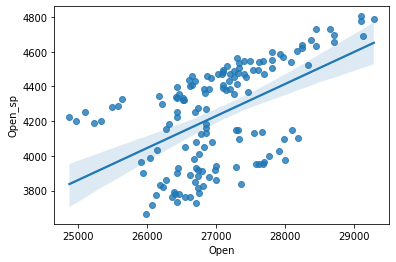

In [199]:
p_coeff_sp_eur_jp, p_value_sp_eur_jp = stats.pearsonr(ejuy['Open'],ejuy['Open_sp'])
print(p_coeff_sp_eur_jp, p_value_sp_eur_jp )

sns.regplot(x = ejuy['Open'], y = ejuy['Open_sp'])

In [200]:
#Procede to model relationships
#Create class and model
lm_sp_eur_jp = LinearRegression()
#Fit the data
lm_sp_eur_jp.fit(ejuy[['1 Yr','Open_eur','Close']],ejuy['Open_sp'])
#Create the model predictions
yhat_sp_eur_jp = lm_sp_eur_jp.predict(ejuy[['1 Yr','Open_eur','Close']])
print(lm_sp_eur_jp.intercept_, lm_sp_eur_jp.coef_)

1196.2301287144364 [-1.64577734e+02  1.97390780e+00  3.24766752e-02]


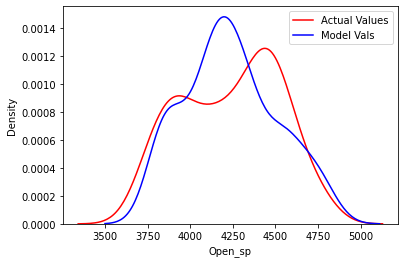

In [201]:
#Plot Model against Sp500 Open Actual Value Distribution
sns.kdeplot(ejuy['Open_sp'], color = 'r', label = 'Actual Values')
sns.kdeplot(yhat_sp_eur_jp, color = 'b', label = 'Model Vals')
plt.legend()

In [202]:
#See the score of the model
lm_sp_eur_jp.score(ejuy[['1 Yr','Open_eur','Close']],ejuy['Open_sp'])

0.8510929298566575

In [203]:
#get intercepts and coeff
lm_sp_eur_jp.intercept_, lm_sp_eur_jp.coef_

(1196.2301287144364,
 array([-1.64577734e+02,  1.97390780e+00,  3.24766752e-02]))

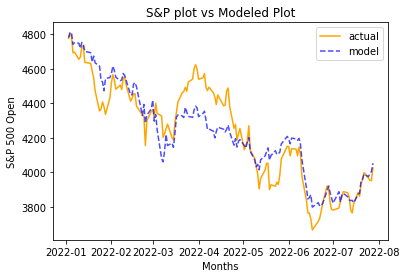

In [204]:
#Plot the modeled values in a graph along the real values.
plt.plot(ejuy.index, ejuy['Open_sp'],'orange',label ='actual')
plt.plot(ejuy.index,yhat_sp_eur_jp,'blue', linestyle = '--', alpha = 0.7, label = 'model')
plt.xlabel('Months')
plt.ylabel('S&P 500 Open')
plt.title('S&P plot vs Modeled Plot')
plt.legend()
plt.savefig('S&P plot vs Modeled Plots', dpi = 300)

In [205]:
#Test if ALL yields are a better explanation since they all have strong correlations
lm_all = LinearRegression()
x2 = ejuy[['1 Mo','2 Mo','3 Mo','6 Mo','1 Yr','2 Yr','5 Yr','10 Yr','30 Yr','Open_sp','Close','Open_eur']]
lm_all.fit(x2, ejuy['Open_sp'])
yhat_all = lm_all.predict(x2)
lm_all.intercept_, lm_all.coef_

(-1.8189894035458565e-12,
 array([-9.10140178e-13,  8.31112956e-13,  1.01143052e-13,  7.08478415e-14,
        -3.19781528e-13,  7.59414667e-13, -1.30956075e-12,  1.41867139e-12,
        -7.80332179e-13,  1.00000000e+00,  5.55111512e-17,  1.38777878e-16]))

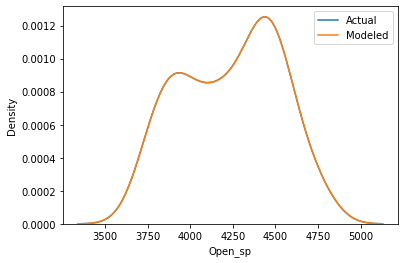

In [206]:
#Plot Model distribution against Open distribution
sns.kdeplot(ejuy['Open_sp'], label = 'Actual')
sns.kdeplot(yhat_all, label = 'Modeled')
plt.legend()

In [207]:
#Check how well does the model fit
lm_all.score(x2, ejuy['Open_sp'])

1.0

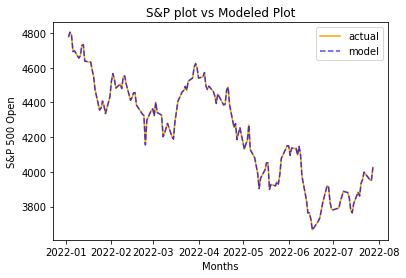

In [208]:
#Plot both the actual values and the model values
plt.plot(ejuy.index, ejuy['Open_sp'],'orange',label ='actual')
plt.plot(ejuy.index,yhat_all,'blue', linestyle = '--', alpha = 0.7, label = 'model')
plt.xlabel('Months')
plt.ylabel('S&P 500 Open')
plt.title('S&P plot vs Modeled Plot')
plt.legend()
plt.savefig('S&P Open plot vs All yield Plots', dpi = 300)

In [209]:
#Test if ALL yields are a better explanation since they all have strong correlations
lm_all_close = LinearRegression()
x = ejuy[['1 Mo','2 Mo','3 Mo','6 Mo','1 Yr','Open_sp','Close','Open_eur']]
lm_all_close.fit(x, ejuy['Close_sp'])
yhat_all_close = lm_all_close.predict(x)
lm_all_close.intercept_, lm_all_close.coef_

(261.19620968207164,
 array([ 3.59937423e+01, -1.03265170e+02, -2.01372139e+01,  1.31948140e+02,
        -7.04801388e+01,  9.22835136e-01, -1.12769101e-04,  7.12249199e-02]))

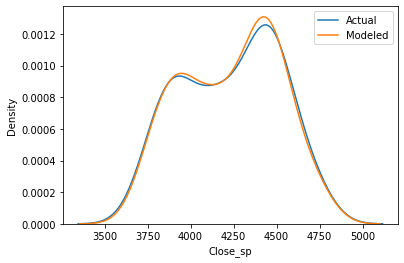

In [210]:
#Plot Model distribution against Close distribution
sns.kdeplot(ejuy['Close_sp'], label = 'Actual')
sns.kdeplot(yhat_all_close, label = 'Modeled')
plt.legend()

In [211]:
#Check how well does the model fit
lm_all_close.score(x, ejuy['Close_sp'])

0.9648470116405631

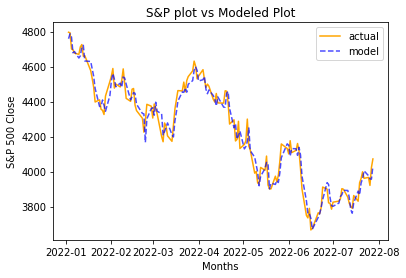

In [212]:
#Plot both the actual values and the model values
plt.plot(ejuy.index, ejuy['Close_sp'],'orange',label ='actual')
plt.plot(ejuy.index,yhat_all_close,'blue', linestyle = '--', alpha = 0.7, label = 'model')
plt.xlabel('Months')
plt.ylabel('S&P 500 Close')
plt.title('S&P plot vs Modeled Plot')
plt.legend()
plt.savefig('S&P Close plot vs All yield Plots', dpi = 300)

In [213]:
#Create a polynomial class instance to transform multiple variables into polynomials
polyreg=PolynomialFeatures(degree=2)
polyreg


PolynomialFeatures()

In [214]:
#Fit and transform variables to a 2nd degree polynomial
x_poly_reg=polyreg.fit_transform(x)

#See the differences in features
print(x.shape,x_poly_reg.shape) 

#TRANSFORMING THE VARIABLES INTO POLYNOMIALS IS SOME ADVANCED HUMONGOUS BRAINS STUFF TO WHICH WE'LL GET LATER. KEEP THEM IN MIND BUCKAROO.

(143, 8) (143, 45)


In [215]:
#Set the pipeline inputs so that we dont have to right them on and on....
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',Ridge())]

#Initialize the pipeline
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge())])

In [216]:
#Cast x as float to avoid error and fit the pipe....
x = x.astype(float)
x2 = x2.astype(float)

pipe.fit(x2,ejuy['Close_sp'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge())])

In [217]:
#Create a yhat object for the pipe so we can run it against actuals
ypipe=pipe.predict(x2)
ypipe[0:5]

array([4759.97190105, 4778.35753141, 4779.56146728, 4671.28285222,
       4675.16826369])

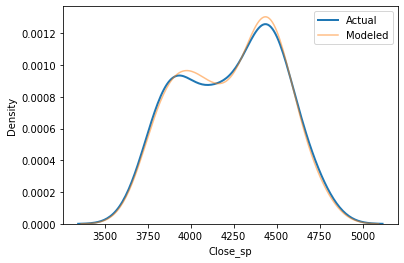

In [218]:
#Plot Model distribution against Close distribution
sns.kdeplot(ejuy['Close_sp'], label = 'Actual', linewidth = 2)
sns.kdeplot(ypipe, label = 'Modeled', alpha = 0.5)
plt.legend()
plt.savefig('Multivariate poly dist vs Sp close dist', dpi = 300)

In [219]:
#Check the multivariate polynomial score
pipe.score(x2, ejuy['Close_sp'])

0.9730109105058512

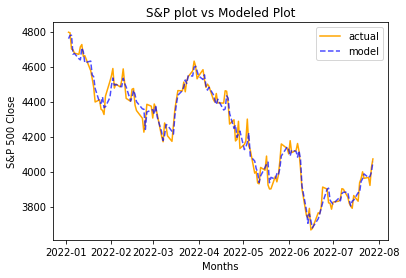

In [220]:
plt.plot(ejuy.index, ejuy['Close_sp'],'orange',label ='actual')
plt.plot(ejuy.index,ypipe,'blue', linestyle = '--', alpha = 0.7, label = 'model')
plt.xlabel('Months')
plt.ylabel('S&P 500 Close')
plt.title('S&P plot vs Modeled Plot')
plt.legend()
plt.savefig('S&P Close plot vs Multivariate polynomial plot', dpi = 300)

In [221]:
# After we found a fitting model is time to test this bad boy
x_train, x_test, y_train, y_test = train_test_split(x, ejuy['Close_sp'] , test_size=0.3, random_state= 1)


In [222]:
#Use our pipe object to see how well does the data fit.
#Fit the model on the training data
pipe.fit(x_train, y_train)
#Use the fitted model on the test data to see how do the values resemble each other
ypipe_train = pipe.predict(x_test)
#Check how well the model fits.
pipe.score(x_test, y_test)


0.951019442193069

In [223]:
#Cross valuation scores of the pipe
cross_val_score(pipe, x2 , ejuy['Close_sp'], cv=5)
#The arrays are trash, this is not the correct type of modeling

array([   0.72830792,    0.22294376,    0.78679377,    0.65620122,
       -103.96824128])

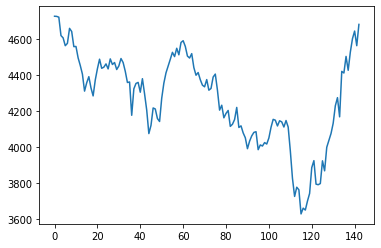

In [224]:
#Cross valuation prediction of the pipe
yhat_cross_pipe = cross_val_predict(pipe, x ,ejuy['Close_sp'],cv=5)
plt.plot(yhat_cross_pipe)
#we can see in the plot that the pipe is not it.

In [225]:
#Ridge regression is a technique used to eliminate multicollinearity in data models. Multicollinearity means that MY VARIABLES ARE CORRELATED WITH EACH OTHER.
#WHICH THEY ARE. CORRELATED AF.

pr=PolynomialFeatures(degree=1)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
yhat_ridge = RigeModel.predict(x_test_pr)
print('predicted:', yhat_ridge[0:10])
print('test set :', y_test[0:10].values)

predicted: [4270.1018294  3730.85248786 4447.22463395 4645.26611411 3808.16793018
 4223.18132674 4359.7241385  4203.96032991 4376.66187159 3997.37593334]
test set : [4175.20019531 3764.79003906 4475.00976562 4670.29003906 3831.38989258
 4277.87988281 4410.12988281 4170.70019531 4462.20996094 3935.17993164]


In [226]:
parameters1= [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 100000, 1000000,10000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 100000, 1000000, 10000000]}]

In [227]:
Grid1 = GridSearchCV(RigeModel, parameters1,cv=5)
Grid1.fit(x,ejuy['Close_sp'])

GridSearchCV(cv=5, estimator=Ridge(alpha=1),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 100000,
                                    1000000, 10000000]}])

In [228]:
BestRidge=Grid1.best_estimator_
BestRidge

Ridge(alpha=100000)

In [229]:
BestRidge.score(x_test, y_test)

0.955964571809922

0.4384122825539885


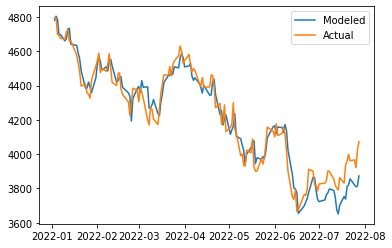

<AxesSubplot:xlabel='Close_sp', ylabel='Density'>

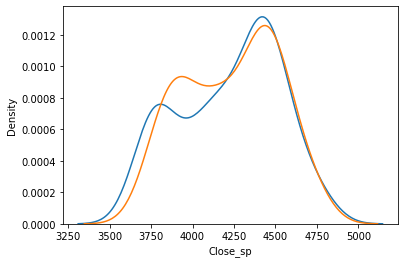

In [230]:
ridge_score_mean = cross_val_score(RigeModel, x2 , ejuy['Close_sp'], cv = 5).mean()
print(ridge_score_mean)
yhat_cross_ridge = cross_val_predict(RigeModel, x2 ,ejuy['Close_sp'],cv = 5)
plt.plot(ejuy.index,yhat_cross_ridge, label = 'Modeled')
plt.plot(ejuy.index, ejuy['Close_sp'], label = 'Actual')
plt.legend()
plt.show()
sns.kdeplot(yhat_cross_ridge)
sns.kdeplot(ejuy['Close_sp'])

In [231]:
len(ejuy['Close_sp']), len(yhat_cross_ridge)

(143, 143)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.06713e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Text(0.5, 1.0, 'R^2 Using Test Data')

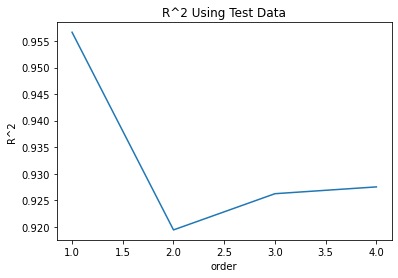

In [232]:
Rsqu_test = []
ltest = LinearRegression()
order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train)
    
    x_test_pr = pr.fit_transform(x_test)    
    
    RigeModel.fit(x_train_pr, y_train)
    
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

In [233]:
BestRidge.intercept_, BestRidge.coef_

(189.44051945859155,
 array([-0.00215437, -0.00284896, -0.00309612, -0.00376275, -0.00506387,
         0.93694207, -0.00449659,  0.15812568]))

In [234]:
x = ejuy[['1 Mo','2 Mo','3 Mo','6 Mo','1 Yr','Open_sp','Close','Open_eur']]
today = [[2.22,2.33,2.56,3.00,3.09,2.86,2.62,2.56,2.89,4104.19,27588.33,1248.30]]


In [235]:
(BestRidge.coef_[0]*2.20+BestRidge.coef_[1]*2.30+BestRidge.coef_[2]*2.35+BestRidge.coef_[3]*2.84+BestRidge.coef_[4]*2.87+BestRidge.coef_[5]*4112.82\
+BestRidge.coef_[6]*27987.25+BestRidge.coef_[7]*1253.04)+BestRidge.intercept_


4115.161451697701

In [236]:
lm_all.predict(today)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4104.19])

In [251]:
#Add more yield data
yields_df_2019 =pd.read_csv('/Users/julianlagier/Desktop/python projects/daily-treasury-rates-2019.csv')
yields_df_2020 =pd.read_csv('/Users/julianlagier/Desktop/python projects/daily-treasury-rates-2020.csv')
yields_df_2021 =pd.read_csv('/Users/julianlagier/Desktop/python projects/daily-treasury-rates-2021.csv')
display(yields_df_2019.head(),yields_df_2020.head(),yields_df_2021.head())

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,12/31/2019,1.48,1.51,1.55,1.60,1.59,1.58,1.62,1.69,1.83,1.92,2.25,2.39
1,12/30/2019,1.51,1.53,1.57,1.60,1.57,1.58,1.59,1.68,1.81,1.90,2.21,2.34
2,12/27/2019,1.56,1.56,1.57,1.59,1.51,1.59,1.60,1.68,1.80,1.88,2.18,2.32
3,12/26/2019,1.59,1.60,1.58,1.61,1.53,1.64,1.65,1.72,1.85,1.90,2.19,2.33
4,12/24/2019,1.55,1.58,1.58,1.61,1.53,1.62,1.64,1.72,1.83,1.90,2.20,2.33


,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,12/31/2020,0.08,0.08,0.09,0.09,0.10,0.13,0.17,0.36,0.65,0.93,1.45,1.65
1,12/30/2020,0.06,0.06,0.08,0.09,0.12,0.12,0.17,0.37,0.66,0.93,1.46,1.66
2,12/29/2020,0.08,0.09,0.10,0.12,0.11,0.12,0.17,0.37,0.66,0.94,1.47,1.67
3,12/28/2020,0.09,0.10,0.11,0.11,0.11,0.13,0.17,0.38,0.65,0.94,1.46,1.67
4,12/24/2020,0.09,0.09,0.09,0.09,0.10,0.13,0.17,0.37,0.66,0.94,1.46,1.66


,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,12/31/2021,0.06,0.05,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
1,12/30/2021,0.06,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
2,12/29/2021,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
3,12/28/2021,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
4,12/27/2021,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88


In [252]:
#Set all indexes as date
yields_df_2019.set_index(yields_df_2019['Date'], drop = True, inplace= True)
yields_df_2020.set_index(yields_df_2020['Date'], drop = True, inplace= True)
yields_df_2021.set_index(yields_df_2021['Date'], drop = True, inplace= True)


In [253]:

#drop extra columns
yields_df_2019.drop('Date', axis = 1, inplace=True)
yields_df_2020.drop('Date', axis = 1, inplace= True)
yields_df_2021.drop('Date', axis = 1, inplace=True)


In [254]:
#Invert the indexes
yields_df_2019 = yields_df_2019.reindex(index = yields_df_2019.index[::-1])
yields_df_2020 = yields_df_2020.reindex(index = yields_df_2020.index[::-1])
yields_df_2021 = yields_df_2021.reindex(index = yields_df_2021.index[::-1])


In [255]:
yields_df_2019.index = pd.to_datetime(yields_df_2019.index)
yields_df_2020.index = pd.to_datetime(yields_df_2020.index)
yields_df_2021.index = pd.to_datetime(yields_df_2021.index)

In [256]:
all_yields = pd.concat([yields_df_2019,yields_df_2020,yields_df_2021,yields_df])

In [329]:
#Get more data for the model in the form of at least 1000 observations
sp3y = sp500['2019-01-01':'2022-07-28']
euro3y = euro_sp['2019-01-01':'2022-07-28']
jap3y = jap_sp['2019-01-01':'2022-07-28']

sp_eur_3y = sp3y.join(euro3y,lsuffix= '_sp', rsuffix='_eur')
sp_eur_jp= sp_eur_3y.join(jap3y)
all_3y = sp_eur_jp.join(all_yields)
all_3y.head()

,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,...,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,0,0,902.049988,912.520020,894.559998,...,2.42,2.51,2.60,2.50,2.47,2.49,2.56,2.66,2.83,2.97
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3822860000,0,0,901.669983,905.770020,896.650024,...,2.41,2.47,2.50,2.39,2.35,2.37,2.44,2.56,2.75,2.92
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4213410000,0,0,904.799988,923.190002,902.119995,...,2.42,2.51,2.57,2.50,2.47,2.49,2.56,2.67,2.83,2.98
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4104710000,0,0,924.809998,925.390015,914.409973,...,2.45,2.54,2.58,2.53,2.51,2.53,2.60,2.70,2.86,2.99
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,4083030000,0,0,920.260010,935.640015,919.520020,...,2.46,2.54,2.60,2.58,2.57,2.58,2.63,2.73,2.88,3.00


In [330]:
#Check correlation which BTW looks good
all_3y.corr()['Close_sp']

Open_sp             0.998558
High_sp             0.999183
Low_sp              0.999270
Close_sp            1.000000
Volume_sp          -0.268916
Dividends_sp             NaN
Stock Splits_sp          NaN
Open_eur            0.892496
High_eur            0.896984
Low_eur             0.887665
Close_eur           0.892222
Volume_eur         -0.228078
Dividends_eur            NaN
Stock Splits_eur         NaN
Open                0.925150
High                0.926973
Low                 0.923011
Close               0.925431
Volume             -0.131168
Dividends                NaN
Stock Splits             NaN
1 Mo               -0.647956
2 Mo               -0.621599
3 Mo               -0.595233
6 Mo               -0.511974
1 Yr               -0.408902
2 Yr               -0.253130
3 Yr               -0.157558
5 Yr               -0.043671
7 Yr                0.012948
10 Yr               0.031692
20 Yr               0.135902
30 Yr              -0.009270
Name: Close_sp, dtype: float64

In [331]:
all_3y.isna().sum()

Open_sp              0
High_sp              0
Low_sp               0
Close_sp             0
Volume_sp            0
Dividends_sp         0
Stock Splits_sp      0
Open_eur             7
High_eur             7
Low_eur              7
Close_eur            7
Volume_eur           7
Dividends_eur        7
Stock Splits_eur     7
Open                63
High                63
Low                 63
Close               63
Volume              63
Dividends           63
Stock Splits        63
1 Mo                 6
2 Mo                 6
3 Mo                 6
6 Mo                 6
1 Yr                 6
2 Yr                 6
3 Yr                 6
5 Yr                 6
7 Yr                 6
10 Yr                6
20 Yr                6
30 Yr                6
dtype: int64

In [332]:
display(all_3y[all_3y['Open_eur'].isna()])
display(all_3y[all_3y['Open'].isna()])
display(all_3y[all_3y['1 Mo'].isna()])

,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,...,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-22,2898.780029,2909.510010,2896.350098,2907.969971,2997950000,0,0,NaN,NaN,NaN,...,2.44,2.47,2.46,2.38,2.36,2.39,2.49,2.59,2.82,2.99
2019-05-01,2952.330078,2954.129883,2923.360107,2923.729980,3645850000,0,0,NaN,NaN,NaN,...,2.43,2.44,2.39,2.31,2.28,2.31,2.41,2.52,2.74,2.92
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,2160680000,0,0,NaN,NaN,NaN,...,1.58,1.61,1.53,1.64,1.65,1.72,1.85,1.90,2.19,2.33
2020-04-13,2782.459961,2782.459961,2721.169922,2761.629883,5274310000,0,0,NaN,NaN,NaN,...,0.26,0.27,0.27,0.25,0.31,0.44,0.63,0.76,1.19,1.39
2020-05-01,2869.090088,2869.090088,2821.610107,2830.709961,4753160000,0,0,NaN,NaN,NaN,...,0.12,0.12,0.17,0.20,0.25,0.36,0.53,0.64,1.04,1.27
2021-04-05,4034.439941,4083.419922,4034.439941,4077.909912,3999760000,0,0,NaN,NaN,NaN,...,0.03,0.04,0.06,0.17,0.37,0.94,1.40,1.73,2.28,2.36
2022-04-18,4385.629883,4410.310059,4370.299805,4391.689941,3509340000,0,0,NaN,NaN,NaN,...,0.81,1.27,1.84,2.46,2.68,2.79,2.85,2.85,3.12,2.95


,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,...,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,0,0,902.049988,912.520020,894.559998,...,2.42,2.51,2.60,2.50,2.47,2.49,2.56,2.66,2.83,2.97
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3822860000,0,0,901.669983,905.770020,896.650024,...,2.41,2.47,2.50,2.39,2.35,2.37,2.44,2.56,2.75,2.92
2019-01-14,2580.310059,2589.320068,2570.409912,2582.610107,3664450000,0,0,928.369995,931.590027,925.020020,...,2.45,2.52,2.57,2.53,2.51,2.53,2.60,2.71,2.91,3.06
2019-02-11,2712.399902,2718.050049,2703.790039,2709.800049,3361970000,0,0,978.909973,985.119995,978.630005,...,2.45,2.51,2.55,2.48,2.47,2.47,2.56,2.65,2.85,3.00
2019-03-21,2819.719971,2860.310059,2817.379883,2854.879883,3546800000,0,0,1043.829956,1047.060059,1039.270020,...,2.49,2.50,2.48,2.41,2.34,2.34,2.44,2.54,2.78,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,4253.750000,4269.680176,4124.279785,4131.930176,3943480000,0,0,1250.189941,1258.349976,1243.729980,...,0.85,1.41,2.10,2.70,2.87,2.92,2.94,2.89,3.14,2.96
2022-05-03,4159.779785,4200.100098,4147.080078,4175.479980,3877530000,0,0,1230.920044,1238.589966,1226.780029,...,0.91,1.45,2.16,2.78,2.95,3.01,3.03,2.97,3.21,3.03
2022-05-04,4181.180176,4307.660156,4148.910156,4300.169922,4236210000,0,0,1240.069946,1240.310059,1226.189941,...,0.89,1.44,2.07,2.66,2.85,2.93,2.97,2.93,3.21,3.01


,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,...,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-14,2965.810059,2972.840088,2962.939941,2966.149902,2557020000,0,0,1090.609985,1091.739990,1082.510010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-11,3080.330078,3088.330078,3075.820068,3087.010010,3035530000,0,0,1123.310059,1128.459961,1122.489990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-12,3500.020020,3549.850098,3499.610107,3534.219971,3428970000,0,0,995.390015,1003.900024,994.289978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-11,3563.219971,3581.159912,3557.000000,3572.659912,4609970000,0,0,1070.890015,1079.260010,1065.979980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-11,4385.439941,4415.879883,4360.589844,4361.189941,2580000000,0,0,1281.930054,1286.130005,1276.050049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-11,4659.390137,4664.549805,4648.310059,4649.270020,2623140000,0,0,1364.040039,1371.270020,1363.140015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
#Use next value to fill all na values.
all_3y[['Open_eur', 'High_eur', 'Low_eur', 'Close_eur','Volume_eur', 'Dividends_eur', 'Stock Splits_eur', 'Open', 'High',
       'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', '1 Mo', '2 Mo',
       '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr',
       '20 Yr', '30 Yr']] = all_3y[['Open_eur', 'High_eur', 'Low_eur', 'Close_eur','Volume_eur', 'Dividends_eur', 'Stock Splits_eur', 'Open', 'High',
       'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', '1 Mo', '2 Mo',
       '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr',
       '20 Yr', '30 Yr']].fillna(method = 'backfill')

In [488]:
#Values are still the same but they are filled now!
all_3y.corr()

,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,...,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Open_sp,1.000000,0.999461,0.999128,0.998558,-0.263708,NaN,NaN,0.893029,0.897082,0.887433,...,-0.596654,-0.513699,-0.410549,-0.254472,-0.158550,-0.044360,0.012124,0.030546,0.134226,-0.011420
High_sp,0.999461,1.000000,0.998803,0.999183,-0.254192,NaN,NaN,0.888859,0.893578,0.883134,...,-0.600410,-0.515897,-0.411245,-0.253758,-0.157444,-0.043473,0.012693,0.030364,0.134314,-0.012681
Low_sp,0.999128,0.998803,1.000000,0.999270,-0.280908,NaN,NaN,0.896436,0.900390,0.892128,...,-0.592299,-0.511238,-0.410238,-0.256148,-0.160691,-0.045975,0.011217,0.030945,0.134781,-0.008994
Close_sp,0.998558,0.999183,0.999270,1.000000,-0.268916,NaN,NaN,0.892094,0.896548,0.887204,...,-0.596195,-0.513303,-0.410572,-0.254854,-0.158977,-0.044617,0.012142,0.030892,0.134967,-0.010420
Volume_sp,-0.263708,-0.254192,-0.280908,-0.268916,1.000000,NaN,NaN,-0.470648,-0.460548,-0.487766,...,-0.280638,-0.277564,-0.271320,-0.281778,-0.303147,-0.341577,-0.353832,-0.365961,-0.358720,-0.354790
Dividends_sp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits_sp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open_eur,0.893029,0.888859,0.896436,0.892094,-0.470648,NaN,NaN,1.000000,0.998858,0.998330,...,-0.261104,-0.202340,-0.127648,0.001581,0.089597,0.205455,0.262369,0.283615,0.356869,0.244855
High_eur,0.897082,0.893578,0.900390,0.896548,-0.460548,NaN,NaN,0.998858,1.000000,0.997825,...,-0.265558,-0.204676,-0.128025,0.003345,0.092051,0.207725,0.264196,0.284368,0.358067,0.243956
Low_eur,0.887433,0.883134,0.892128,0.887204,-0.487766,NaN,NaN,0.998330,0.997825,1.000000,...,-0.251667,-0.195089,-0.123031,0.003229,0.090170,0.206198,0.263778,0.286758,0.360057,0.251121


In [427]:
#Prepare training and testing data
x3 = all_3y[['1 Mo','2 Mo','3 Mo','6 Mo','1 Yr','Close','Open_eur']]
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, all_3y['Close_sp'] , test_size=0.3, random_state= 2)



In [428]:
#Prepare train data and test data as polynomials
pr3=PolynomialFeatures(degree=3)
x3_train_pr=pr3.fit_transform(x3_train)
x3_test_pr=pr3.fit_transform(x3_test)
RigeModel3=Ridge(alpha = 100)
RigeModel3.fit(x3_train_pr, y3_train)
yhat_ridge3 = RigeModel3.predict(x3_test_pr)
print('predicted:', yhat_ridge3[0:10])
print('test set :', y3_test[0:10].values)

predicted: [3984.41645756 3941.55821999 3366.51923456 3072.46113033 2925.55469049
 2889.47606526 2804.38234799 3222.87340912 4080.96115312 3265.3006685 ]
test set : [3971.09008789 3943.34008789 3335.4699707  2937.7800293  2918.64990234
 2892.73999023 2826.06005859 3334.68994141 3991.23999023 3239.90991211]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.78014e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [429]:
#Search for the best alpha
parameters1= [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 100000, 1000000,10000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 100000, 1000000, 10000000]}]

In [430]:
#Search for best alpha
Grid3 = GridSearchCV(RigeModel3, parameters1,cv=5)
Grid3.fit(x3,all_3y['Close_sp'])
BestRidge=Grid3.best_estimator_

In [431]:
#Check score on test data
RigeModel3.score(x3_test_pr,y3_test)

0.9884336596147086

0.3860390825449756


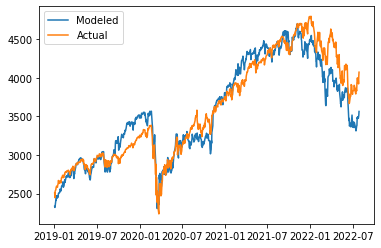

In [432]:
#Graphically show k-fold data
ridge_score_mean3 = cross_val_score(RigeModel3, x3 , all_3y['Close_sp'], cv = 5).mean()
print(ridge_score_mean3)
yhat_cross_ridge3 = cross_val_predict(RigeModel3, x3 ,all_3y['Close_sp'],cv = 5)
plt.plot(all_3y.index,yhat_cross_ridge3, label = 'Modeled')
plt.plot(all_3y.index, all_3y['Close_sp'], label = 'Actual')
plt.legend()
plt.show()

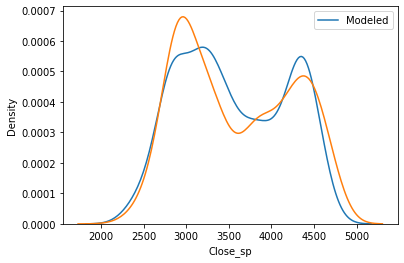

In [433]:
sns.kdeplot(yhat_cross_ridge3,label = 'Modeled')
sns.kdeplot(all_3y['Close_sp'])
plt.legend()

In [446]:
#Get the Dollar index loaded up for comparisons
dxyindex = yf.Ticker('DX-Y.NYB')
#Check if we got the correct data
dxy_all = dxyindex.history(period='max')


In [447]:
#Slice index for the years needed
dxy = dxy_all['2019-01-01':'2022-07-28']
dxy.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,96.139999,96.959999,95.820000,96.820000,0,0,0
2019-01-03,96.720001,96.750000,96.209999,96.309998,0,0,0
2019-01-04,96.279999,96.610001,96.050003,96.190002,0,0,0
2019-01-07,96.160004,96.160004,95.639999,95.709999,0,0,0
2019-01-08,95.690002,96.029999,95.680000,95.900002,0,0,0


In [448]:
#Join dfs and see if dxy is relevant
dxy_3 = all_3y.join(dxy,rsuffix='_dxy')
dxy_3.corr()

,Open_sp,High_sp,Low_sp,Close_sp,Volume_sp,Dividends_sp,Stock Splits_sp,Open_eur,High_eur,Low_eur,...,10 Yr,20 Yr,30 Yr,Open_dxy,High_dxy,Low_dxy,Close_dxy,Volume_dxy,Dividends_dxy,Stock Splits_dxy
Open_sp,1.000000,0.999461,0.999128,0.998558,-0.263708,NaN,NaN,0.893029,0.897082,0.887433,...,0.030546,0.134226,-0.011420,-0.279001,-0.274249,-0.279138,-0.276142,NaN,NaN,NaN
High_sp,0.999461,1.000000,0.998803,0.999183,-0.254192,NaN,NaN,0.888859,0.893578,0.883134,...,0.030364,0.134314,-0.012681,-0.271789,-0.266828,-0.272324,-0.269233,NaN,NaN,NaN
Low_sp,0.999128,0.998803,1.000000,0.999270,-0.280908,NaN,NaN,0.896436,0.900390,0.892128,...,0.030945,0.134781,-0.008994,-0.287238,-0.283408,-0.287172,-0.285262,NaN,NaN,NaN
Close_sp,0.998558,0.999183,0.999270,1.000000,-0.268916,NaN,NaN,0.892094,0.896548,0.887204,...,0.030892,0.134967,-0.010420,-0.279323,-0.274833,-0.279444,-0.277123,NaN,NaN,NaN
Volume_sp,-0.263708,-0.254192,-0.280908,-0.268916,1.000000,NaN,NaN,-0.470648,-0.460548,-0.487766,...,-0.365961,-0.358720,-0.354790,0.002567,0.021148,-0.012010,0.008254,NaN,NaN,NaN
Dividends_sp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits_sp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open_eur,0.893029,0.888859,0.896436,0.892094,-0.470648,NaN,NaN,1.000000,0.998858,0.998330,...,0.283615,0.356869,0.244855,-0.173450,-0.176966,-0.166685,-0.172301,NaN,NaN,NaN
High_eur,0.897082,0.893578,0.900390,0.896548,-0.460548,NaN,NaN,0.998858,1.000000,0.997825,...,0.284368,0.358067,0.243956,-0.165658,-0.168923,-0.159230,-0.164590,NaN,NaN,NaN
Low_eur,0.887433,0.883134,0.892128,0.887204,-0.487766,NaN,NaN,0.998330,0.997825,1.000000,...,0.286758,0.360057,0.251121,-0.181046,-0.185889,-0.174030,-0.180757,NaN,NaN,NaN


In [449]:
#See if there is any NAs
dxy_3.isna().any()

Open_sp             False
High_sp             False
Low_sp              False
Close_sp            False
Volume_sp           False
Dividends_sp        False
Stock Splits_sp     False
Open_eur            False
High_eur            False
Low_eur             False
Close_eur           False
Volume_eur          False
Dividends_eur       False
Stock Splits_eur    False
Open                False
High                False
Low                 False
Close               False
Volume              False
Dividends           False
Stock Splits        False
1 Mo                False
2 Mo                False
3 Mo                False
6 Mo                False
1 Yr                False
2 Yr                False
3 Yr                False
5 Yr                False
7 Yr                False
10 Yr               False
20 Yr               False
30 Yr               False
Open_dxy            False
High_dxy            False
Low_dxy             False
Close_dxy           False
Volume_dxy          False
Dividends_dx

In [515]:
#Prepare training and testing data with DXY now
x4 =dxy_3[['3 Mo','6 Mo','1 Yr','Open_sp','Open_eur','Close']]
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, dxy_3['Close_sp'] , test_size=0.3, random_state= 4)

In [538]:
#Prepare train data and test data as polynomials
pr4=PolynomialFeatures(degree=2)
x4_train_pr=pr4.fit_transform(x4_train)
x4_test_pr=pr4.fit_transform(x4_test)
RigeModel4=Ridge(alpha=1000)
RigeModel4.fit(x4_train_pr, y4_train)
yhat_ridge4 = RigeModel4.predict(x4_test_pr)
print('predicted:', yhat_ridge4[0:10])
print('test set :', y4_test[0:10].values)

predicted: [4550.65730208 4318.03786164 3443.0653814  4451.49271384 3358.74483652
 4543.1375975  3300.90928726 4472.93062082 3150.15801111 3118.91345882]
test set : [4504.08007812 4363.54980469 3426.95996094 4520.16015625 3319.4699707
 4591.66992188 3316.81005859 4393.66015625 3116.38989258 3122.87011719]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.52472e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [539]:
#Search for best alpha
Grid4 = GridSearchCV(RigeModel4, parameters1,cv=5)
Grid3.fit(x4,dxy_3['Close_sp'])
BestRidge=Grid3.best_estimator_
BestRidge

Ridge(alpha=1000)

0.9515893055558526


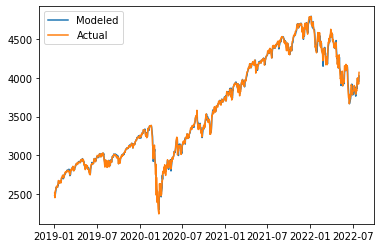

In [540]:
#Graphically show k-fold data
ridge_score_mean4 = cross_val_score(RigeModel4, x4 , dxy_3['Close_sp'], cv = 10).mean()
print(ridge_score_mean4)
yhat_cross_ridge4 = cross_val_predict(RigeModel4, x4 ,dxy_3['Close_sp'],cv = 10)
plt.plot(dxy_3.index,yhat_cross_ridge4, label = 'Modeled')
plt.plot(dxy_3.index, dxy_3['Close_sp'], label = 'Actual')
plt.legend()
plt.show()

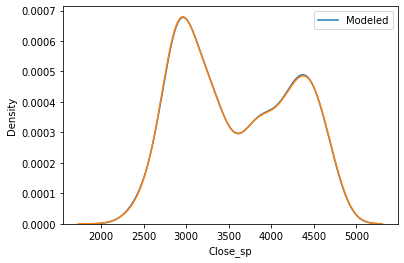

In [541]:
#Show distribution plots
sns.kdeplot(yhat_cross_ridge4,label = 'Modeled')
sns.kdeplot(dxy_3['Close_sp'])
plt.legend()

In [542]:
today = [[2.47,2.94,3.08,4225.02,1267.83,28546.98]]
today_pr = pr4.fit_transform(today)
RigeModel4.predict(today_pr)

array([4230.56203502])